## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

C:\Users\Owner\Anaconda2\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


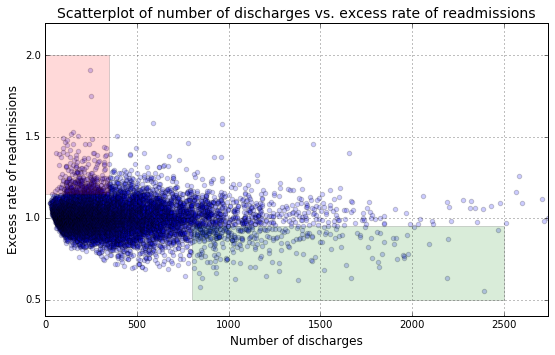

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Part A

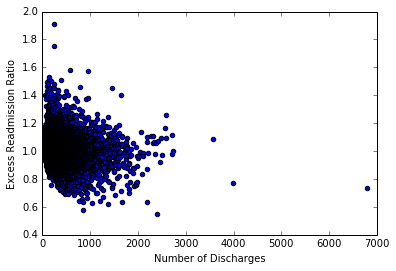

In [5]:
df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
df = df[['Number of Discharges','Excess Readmission Ratio']]
df.plot(x='Number of Discharges',y='Excess Readmission Ratio',kind='scatter',xlim=[0,7000])

I agree that the rate of readmissions seems to be trending down with increasing number of discharges

In [6]:
dflow = df[df['Number of Discharges'] <= 350]
nlow = len(dflow)
dfhigh = df[df['Number of Discharges'] >= 800]
nhigh = len(dfhigh)
excesslow = float(len(dflow[dflow['Excess Readmission Ratio']>1]))/len(dflow)
excesshigh = float(len(dfhigh[dfhigh['Excess Readmission Ratio']>1]))/len(dfhigh)
print "Percent of low discharge hosptitals with excess ratios=", excesslow*100
print "Percent of high discharge hosptitals with excess ratios=", excesshigh*100

Percent of low discharge hosptitals with excess ratios= 53.2886289057
Percent of high discharge hosptitals with excess ratios= 47.3975636766


I agree with these two statements:
With lower number of discharges, there is a greater incidence of excess rate of readmissions
With higher number of discharges, there is a greater incidence of lower rates of readmissions

In [19]:
print sum(df100['Excess Readmission Ratio'])/len(df100)
print df100['Excess Readmission Ratio'].mean()

1.02261835017
1.02261835017


In [20]:
df100 = df[df['Number of Discharges'] < 100]
df100mean = df100['Excess Readmission Ratio'].mean()
df100excess = float(len(df100[df100['Excess Readmission Ratio']>1]))/len(df100)
df1000 = df[df['Number of Discharges'] > 1000]
df1000mean = df1000['Excess Readmission Ratio'].mean()
df1000excess = float(len(df1000[df1000['Excess Readmission Ratio']>1]))/len(df1000)
print "In hospitals/facilities with number of discharges < 100, mean excess readmission rate is",df100mean,"and",\
df100excess*100,"% have excess readmission rate greater than 1"
print
print "In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is",df1000mean,"and",\
df1000excess*100,"% have excess readmission rate greater than 1"
print 
print "Percent of data not used is", 100*float(len(df)-len(df100)-len(df1000))/len(df)

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.02261835017 and 63.2154882155 % have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978335421166 and 44.4924406048 % have excess readmission rate greater than 1

Percent of data not used is 85.639732104


I agree with both of the statistics given in their analysis

However, they have provided no statistical analysis of the significance of these two statements.  They should perform some type of hypothesis test to determine if this could just be due to random chance.  Also, they have excluded approximately 85.6% of the data available. They also make recommendations for hospitals with up to 300 discharges without using any data from 101 to 300 discharges.

# Part B

H0: mean excess readmission rate of hospitals under 300 discharges is equal to mean excess readmission rate of hospitals under 300 discharges

H1: mean excess readmission rate of hospitals over 300 discharges is greater than mean excess readmission rate of hospitals over 300 discharges

In [36]:
dfsmall = df[df['Number of Discharges'] <= 300]
dfsmallmean = dfsmall['Excess Readmission Ratio'].mean()
dfsmallstd = dfsmall['Excess Readmission Ratio'].std()
dfsmalln = len(dfsmall)
dfsmallexcess = float(len(dfsmall[dfsmall['Excess Readmission Ratio']>1]))/len(dfsmall)
dfbig = df[df['Number of Discharges'] > 300]
dfbigmean = dfbig['Excess Readmission Ratio'].mean()
dfbigstd = dfbig['Excess Readmission Ratio'].std()
dfbign = len(dfbig)
dfbigexcess = float(len(dfbig[dfbig['Excess Readmission Ratio']>1]))/len(dfbig)

print "In hospitals/facilities with number of discharges <= 300, mean excess readmission rate is",dfsmallmean,"and",\
dfsmallexcess*100,"% have excess readmission rate greater than 1"
print
print "In hospitals/facilities with number of discharges > 300, mean excess readmission rate is",dfbigmean,"and",\
dfbigexcess*100,"% have excess readmission rate greater than 1"
print
print "Difference in means =", dfsmallmean - dfbigmean
diffstd = np.sqrt((dfsmallstd*dfsmallstd/dfsmalln)+(dfbigstd*dfbigstd/dfbign))
print "Standard devation of difference of the means =", diffstd
z = (dfsmallmean-dfbigmean)/diffstd
p_value = stats.norm.cdf(-z)
print "Z-score =", z
print "P-value =", p_value

In hospitals/facilities with number of discharges <= 300, mean excess readmission rate is 1.01426055121 and 53.7834311807 % have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 300, mean excess readmission rate is 0.999781043802 and 49.2264678472 % have excess readmission rate greater than 1

Difference in means = 0.0144795074044
Standard devation of difference of the means = 0.00173729619845
Z-score = 8.33450704449
P-value = 3.89108703054e-17


My analysis of hospitals with more and less than 300 discharges shows that the hospitals with less than 300 discharges do have higher excess readmission rates than those with over 300 discharges.  My results return a p value much lower than the .01 significance level I was searching for.  However, I think the suggestion of combining small hospitals makes little sense practically.  You cannot just magically combine two seperate building/insitutions.